In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
import time
from datetime import datetime

In [19]:
#starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
print(cities)

['ushuaia', 'barrow', 'zhigansk', 'saint-philippe', 'mahebourg', 'tabiauea', 'east london', 'pacifica', 'deputatskiy', 'kholodnyy', 'carnarvon', 'bluff', 'dikson', 'rikitea', 'vaini', 'rafaela', 'severo-kurilsk', 'lexington', 'puerto ayora', 'nicoya', 'vestmanna', 'chara', 'salalah', 'khatanga', 'punta arenas', 'busselton', 'kavieng', 'butaritari', 'westport', 'susanville', 'thompson', 'cape town', 'gillette', 'barentsburg', 'am timan', 'nikolskoye', 'gunjur', 'abu dhabi', 'bontang', 'ponta do sol', 'labuhan', 'los llanos de aridane', 'jacareacanga', 'port alfred', 'ust-nera', 'victoria', 'mys shmidta', 'mbigou', 'barcelos', 'longyearbyen', 'aklavik', 'hobart', 'kapaa', 'hasaki', 'brookhaven', 'albany', 'tiznit', 'kahului', 'hermanus', 'klaksvik', 'saint-denis', 'emet', 'kulhudhuffushi', 'hambantota', 'tuktoyaktuk', 'utiroa', 'sao felix do xingu', 'provideniya', 'belushya guba', 'ravar', 'tabou', 'arraial do cabo', 'sijunjung', 'tasiilaq', 'coracora', 'ahipara', 'taolanaro', 'hede', 's

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.????replace
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | zhigansk
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | pacifica
Processing Record 9 of Set 1 | deputatskiy
Processing Record 10 of Set 1 | kholodnyy
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | rafaela
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | lexington
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | nicoya
Processing Record 21 of Set 1 | vestmanna
Processing Record 22 of Set 1 | chara
Processing Record 23 of Set 1 | salalah
Processing Record 24 of Set 1 

Processing Record 40 of Set 4 | sinegorye
Processing Record 41 of Set 4 | rundu
Processing Record 42 of Set 4 | kigoma
Processing Record 43 of Set 4 | nelson bay
Processing Record 44 of Set 4 | chaykovskaya
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | starobaltachevo
Processing Record 47 of Set 4 | pangody
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | prado
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | sechura
Processing Record 3 of Set 5 | baracoa
Processing Record 4 of Set 5 | kumluca
Processing Record 5 of Set 5 | lerdo
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | ambon
Processing Record 9 of Set 5 | sibu
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | margate
Processing Record 12 of Set 5 | krasnoselkup
Processing Record 13 of Set 5 | polunochnoye
Processing Rec

Processing Record 35 of Set 8 | waw
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | tonantins
Processing Record 38 of Set 8 | chodavaram
Processing Record 39 of Set 8 | killybegs
Processing Record 40 of Set 8 | mayo
Processing Record 41 of Set 8 | talaya
Processing Record 42 of Set 8 | havelock
Processing Record 43 of Set 8 | peniche
Processing Record 44 of Set 8 | zvishavane
Processing Record 45 of Set 8 | nanae
Processing Record 46 of Set 8 | azar shahr
City not found. Skipping...
Processing Record 47 of Set 8 | artyk
City not found. Skipping...
Processing Record 48 of Set 8 | san quintin
Processing Record 49 of Set 8 | alcudia
Processing Record 50 of Set 8 | comodoro rivadavia
Processing Record 1 of Set 9 | auki
Processing Record 2 of Set 9 | alta floresta
Processing Record 3 of Set 9 | lorengau
Processing Record 4 of Set 9 | havre-saint-pierre
Processing Record 5 of Set 9 | znamenskoye
Processing Record 6 of Set 9 | matagami
Processing Record 7 of Set 9 | pl

Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | clyde river
Processing Record 22 of Set 12 | shunyi
Processing Record 23 of Set 12 | tibu
Processing Record 24 of Set 12 | maragogi
Processing Record 25 of Set 12 | sindor
Processing Record 26 of Set 12 | winnemucca
Processing Record 27 of Set 12 | piedras negras
Processing Record 28 of Set 12 | cascas
Processing Record 29 of Set 12 | panjwin
City not found. Skipping...
Processing Record 30 of Set 12 | valday
Processing Record 31 of Set 12 | tubruq
City not found. Skipping...
Processing Record 32 of Set 12 | bereda
Processing Record 33 of Set 12 | muskegon
Processing Record 34 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 35 of Set 12 | biak
Processing Record 36 of Set 12 | neepawa
Processing Record 37 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 38 of Set 12 | samarai
Processing Record 39 of Set 12 | dianopo

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.22,66,40,23.02,AR,2022-01-31 20:27:25
1,Barrow,71.2906,-156.7887,-12.98,77,0,9.22,US,2022-01-31 20:27:26
2,Zhigansk,66.7697,123.3711,-30.82,99,88,7.99,RU,2022-01-31 20:27:26
3,Saint-Philippe,-21.3585,55.7679,80.19,79,94,15.17,RE,2022-01-31 20:26:22
4,Mahebourg,-20.4081,57.7000,80.89,74,75,18.41,MU,2022-01-31 20:27:27
5,East London,-33.0153,27.9116,77.41,81,100,3.38,ZA,2022-01-31 20:27:27
6,Pacifica,37.6138,-122.4869,61.93,78,75,5.01,US,2022-01-31 20:22:33
7,Deputatskiy,69.3000,139.9000,-25.17,100,61,3.74,RU,2022-01-31 20:27:27
8,Kholodnyy,62.7167,147.9500,-3.30,99,100,4.14,RU,2022-01-31 20:27:28
9,Carnarvon,-24.8667,113.6333,77.07,78,0,18.41,AU,2022-01-31 20:27:28


In [32]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-01-31 20:27:25,-54.8000,-68.3000,53.22,66,40,23.02
1,Barrow,US,2022-01-31 20:27:26,71.2906,-156.7887,-12.98,77,0,9.22
2,Zhigansk,RU,2022-01-31 20:27:26,66.7697,123.3711,-30.82,99,88,7.99
3,Saint-Philippe,RE,2022-01-31 20:26:22,-21.3585,55.7679,80.19,79,94,15.17
4,Mahebourg,MU,2022-01-31 20:27:27,-20.4081,57.7000,80.89,74,75,18.41


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

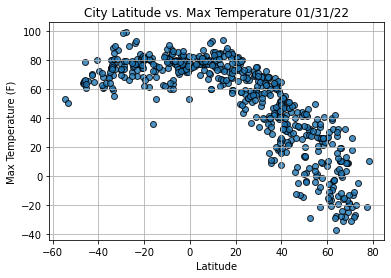

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

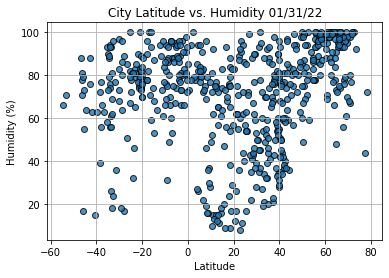

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

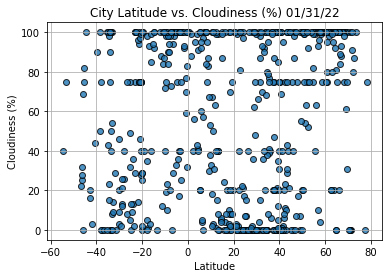

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

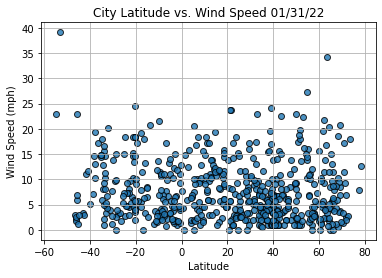

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()